In [215]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import seaborn as sn

In [216]:
data = pd.read_csv(r'Documents\fraud.csv')
# data = pd.read_csv(r'C:\Users\omar elayan\OneDrive\Documents\fraud.csv')

In [217]:
data

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


# Data Preprocessing

In [218]:
data.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [219]:
#Getting information about the data
data.info

<bound method DataFrame.info of         step       customer  age gender zipcodeOri       merchant zipMerchant  \
0          0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1          0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2          0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3          0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
4          0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   
...      ...            ...  ...    ...        ...            ...         ...   
594638   179  'C1753498738'  '3'    'F'    '28007'  'M1823072687'     '28007'   
594639   179   'C650108285'  '4'    'F'    '28007'  'M1823072687'     '28007'   
594640   179   'C123623130'  '2'    'F'    '28007'   'M349281107'     '28007'   
594641   179  'C1499363341'  '5'    'M'    '28007'  'M1823072687'     '28007'   
594642   179   'C616528518'  '4'    'F'    '28007'  'M1823072687'     '28007'

In [220]:
data.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [221]:
data['age'].value_counts()

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64

In [222]:
data['gender'].value_counts()

'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: gender, dtype: int64

Checking Missing Values in the Dataset!

In [223]:
#There are no missing values in te dataset

data.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [224]:
data.isnull().values.any()

False

Checking the correlation between the features and the target

In [225]:
data.corr()["fraud"].sort_values()

step     -0.011898
amount    0.489967
fraud     1.000000
Name: fraud, dtype: float64

Encoding Categorical Features

In [226]:
#(Age) is an (ordinal categorical variable) with order, so we'll use (Label Encoding)

label_encoder = LabelEncoder()
data['encoded_age'] = label_encoder.fit_transform(data['age'])

#drop the categorical age
data = data.drop(columns=['age'])

In [227]:
#(Gender) is a (nominal categorical variable) with no order, so we'll use (One-Hot Encoding)

data = pd.get_dummies(data, columns=['gender'], prefix='gender')

In [228]:
data

,step,customer,zipcodeOri,merchant,zipMerchant,category,amount,fraud,encoded_age,gender_'E',gender_'F',gender_'M',gender_'U'
0,0,'C1093826151','28007','M348934600','28007','es_transportation',4.55,0,4,0,0,1,0
1,0,'C352968107','28007','M348934600','28007','es_transportation',39.68,0,2,0,0,1,0
2,0,'C2054744914','28007','M1823072687','28007','es_transportation',26.89,0,4,0,1,0,0
3,0,'C1760612790','28007','M348934600','28007','es_transportation',17.25,0,3,0,0,1,0
4,0,'C757503768','28007','M348934600','28007','es_transportation',35.72,0,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','28007','M1823072687','28007','es_transportation',20.53,0,3,0,1,0,0
594639,179,'C650108285','28007','M1823072687','28007','es_transportation',50.73,0,4,0,1,0,0
594640,179,'C123623130','28007','M349281107','28007','es_fashion',22.44,0,2,0,1,0,0
594641,179,'C1499363341','28007','M1823072687','28007','es_transportation',14.46,0,5,0,0,1,0


In [229]:
#zipcodeori and zipMerchant columns have only one unique value

data.zipcodeOri.nunique()

1

In [230]:
data.zipMerchant.nunique()

1

In [231]:
#so will be droped
data = data.drop(['zipcodeOri','zipMerchant'],axis=1)

In [232]:
data

,step,customer,merchant,category,amount,fraud,encoded_age,gender_'E',gender_'F',gender_'M',gender_'U'
0,0,'C1093826151','M348934600','es_transportation',4.55,0,4,0,0,1,0
1,0,'C352968107','M348934600','es_transportation',39.68,0,2,0,0,1,0
2,0,'C2054744914','M1823072687','es_transportation',26.89,0,4,0,1,0,0
3,0,'C1760612790','M348934600','es_transportation',17.25,0,3,0,0,1,0
4,0,'C757503768','M348934600','es_transportation',35.72,0,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','M1823072687','es_transportation',20.53,0,3,0,1,0,0
594639,179,'C650108285','M1823072687','es_transportation',50.73,0,4,0,1,0,0
594640,179,'C123623130','M349281107','es_fashion',22.44,0,2,0,1,0,0
594641,179,'C1499363341','M1823072687','es_transportation',14.46,0,5,0,0,1,0


Split the dataset into features and target variable

In [234]:
#features
X = data.drop(['fraud'],axis=1)

#target
y = data['fraud']

In [235]:
X

,step,customer,merchant,category,amount,encoded_age,gender_'E',gender_'F',gender_'M',gender_'U'
0,0,'C1093826151','M348934600','es_transportation',4.55,4,0,0,1,0
1,0,'C352968107','M348934600','es_transportation',39.68,2,0,0,1,0
2,0,'C2054744914','M1823072687','es_transportation',26.89,4,0,1,0,0
3,0,'C1760612790','M348934600','es_transportation',17.25,3,0,0,1,0
4,0,'C757503768','M348934600','es_transportation',35.72,5,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','M1823072687','es_transportation',20.53,3,0,1,0,0
594639,179,'C650108285','M1823072687','es_transportation',50.73,4,0,1,0,0
594640,179,'C123623130','M349281107','es_fashion',22.44,2,0,1,0,0
594641,179,'C1499363341','M1823072687','es_transportation',14.46,5,0,0,1,0


In [236]:
y

0         0
1         0
2         0
3         0
4         0
         ..
594638    0
594639    0
594640    0
594641    0
594642    0
Name: fraud, Length: 594643, dtype: int64

# Exploratory Data Analysis (EDA)

1.Explore the distribution of the target variable (Fraud) to understand the class imbalance.

In [237]:
fraud_counts = y.value_counts()
fraud_counts

#Most of the data is not fraud (Benign)

0    587443
1      7200
Name: fraud, dtype: int64

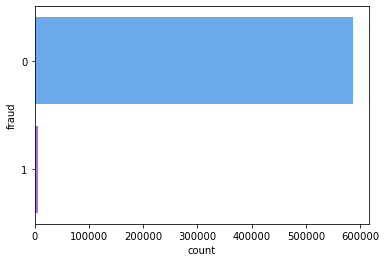

In [238]:
#Count Plot

sns.countplot(y = data['fraud'], palette='cool');

#The target is highly Imbalanced

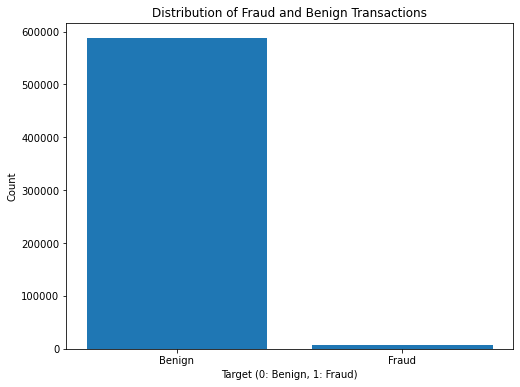

In [239]:
#Visualizing the class distribution using (Bar chart)

plt.figure(figsize=(8, 6))
plt.bar(fraud_counts.index, fraud_counts.values)
plt.xlabel('Target (0: Benign, 1: Fraud)')
plt.ylabel('Count')
plt.title('Distribution of Fraud and Benign Transactions')
plt.xticks([0, 1], ['Benign', 'Fraud'])
plt.show()

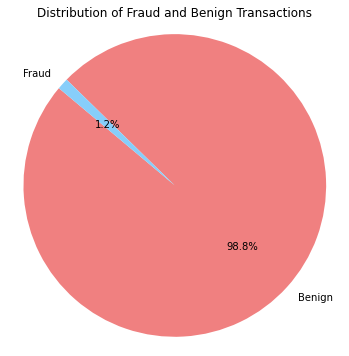

In [240]:
#Visualizing the class distribution using (Pie chart)
#The pie chart to show the percentage of fraud and benign transactions in the dataset

plt.figure(figsize=(6, 6))
labels = ['Benign', 'Fraud']
sizes = fraud_counts.values
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution of Fraud and Benign Transactions')
plt.show()

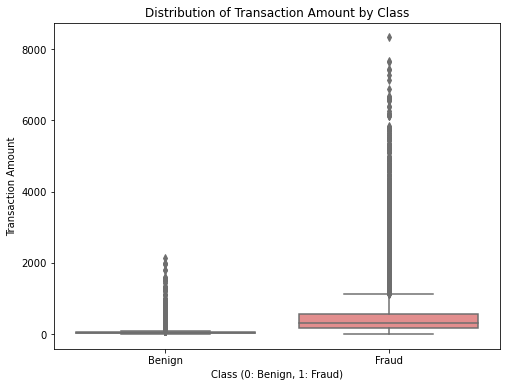

In [241]:
#Visualizing the class distribution using (Box Plot)

plt.figure(figsize=(8, 6))
sns.boxplot(x=y, y=X['amount'], palette=['skyblue', 'lightcoral'])
plt.xlabel('Class (0: Benign, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.title('Distribution of Transaction Amount by Class')
plt.xticks([0, 1], ['Benign', 'Fraud'])
plt.show()

In [242]:
#Calculating the imbalance ratio, where a higher imbalance ratio indicates a more imbalanced dataset

imbalance_ratio = fraud_counts[0] / fraud_counts[1]
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 81.59


2.Analyze the distribution of features and their relationships with the target variable

-For Numerical Features

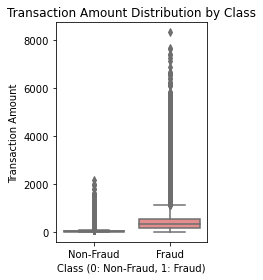

In [243]:
#Box plot for 'amount' by class

plt.subplot(1, 2, 2)
sns.boxplot(x=y, y=X['amount'], palette=['skyblue', 'lightcoral'])
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Distribution by Class')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

plt.tight_layout()
plt.show()

In [244]:
#Calculate mean and median of (amount) by class
#Summary statistics to analyze how numerical features are related to the class

amount_summary = X.groupby(y)['amount'].agg(['mean', 'median'])
print(amount_summary)

             mean   median
fraud                     
0       31.847230   26.610
1      530.926551  319.175


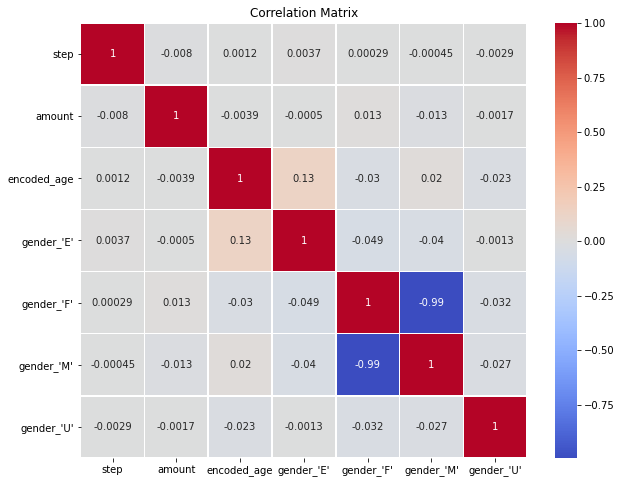

In [245]:
#Visualizing the correlation matrix
#For showing how numerical features are correlated with the class

correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

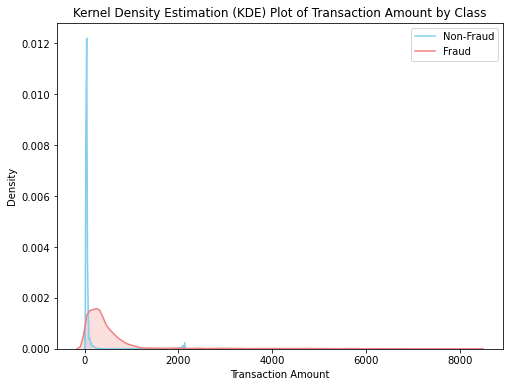

In [246]:
#Creating Kernel Density Estimation KDE plots for (amount) by class
#For comparing the distribution of transaction amounts between the two classes more smoothly

plt.figure(figsize=(8, 6))
sns.kdeplot(X[y == 0]['amount'], label='Non-Fraud', shade=True, color='skyblue')
sns.kdeplot(X[y == 1]['amount'], label='Fraud', shade=True, color='lightcoral')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot of Transaction Amount by Class')
plt.legend()
plt.show()

-Caregorical Features

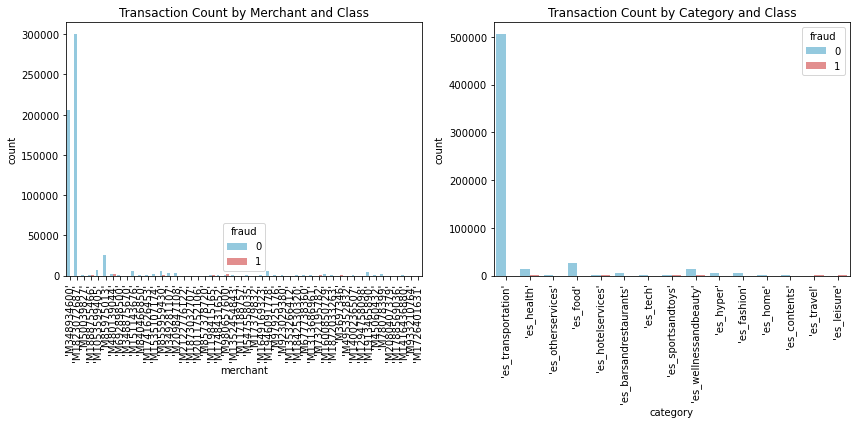

In [247]:
#Plotting the count plots for (merchant) and (category) by class

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=X, x='merchant', hue=y, palette=['skyblue', 'lightcoral'])
plt.title('Transaction Count by Merchant and Class')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=X, x='category', hue=y, palette=['skyblue', 'lightcoral'])
plt.title('Transaction Count by Category and Class')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [248]:
#Calculate class-wise frequencies for 'merchant' and 'category'
#How feature values are distributed differently over class values

merchant_freq = X.groupby(y)['merchant'].value_counts(normalize=True).unstack(fill_value=0)
category_freq = X.groupby(y)['category'].value_counts(normalize=True).unstack(fill_value=0)

In [249]:
merchant_freq

merchant,'M1053599405','M117188757','M1198415165','M1294758098','M1313686961','M1352454843','M1353266412','M1400236507','M1416436880','M151143676',...,'M732195782','M78078399','M840466850','M855959430','M857378720','M85975013','M923029380','M933210764','M97925176','M980657600'
fraud,,,,,,,,,,,,,,,,,,,,,
0,0.011611,0.000036,0.002080,0.000012,0.000897,0.00063,0.000024,0.001321,0.000375,0.010644,...,0.000153,0.002662,0.002113,0.009904,0.000051,0.044692,0.000376,0.000097,0.00102,0.000506
1,0.000000,0.000000,0.049722,0.025556,0.000000,0.00000,0.008889,0.000000,0.000000,0.016667,...,0.071944,0.006111,0.021944,0.038889,0.012778,0.000000,0.014167,0.001667,0.00000,0.204444


In [250]:
category_freq

category,'es_barsandrestaurants','es_contents','es_fashion','es_food','es_health','es_home','es_hotelservices','es_hyper','es_leisure','es_otherservices','es_sportsandtoys','es_tech','es_transportation','es_travel','es_wellnessandbeauty'
fraud,,,,,,,,,,,,,,,
0,0.010644,0.001507,0.010789,0.044692,0.024576,0.002867,0.002036,0.009904,0.000043,0.001164,0.003439,0.003765,0.85986,0.000255,0.024459
1,0.016667,0.000000,0.016111,0.000000,0.235556,0.041944,0.076111,0.038889,0.065833,0.031667,0.275278,0.021944,0.00000,0.080278,0.099722


3.Visualize trends, patterns, and potential outliers in the data.

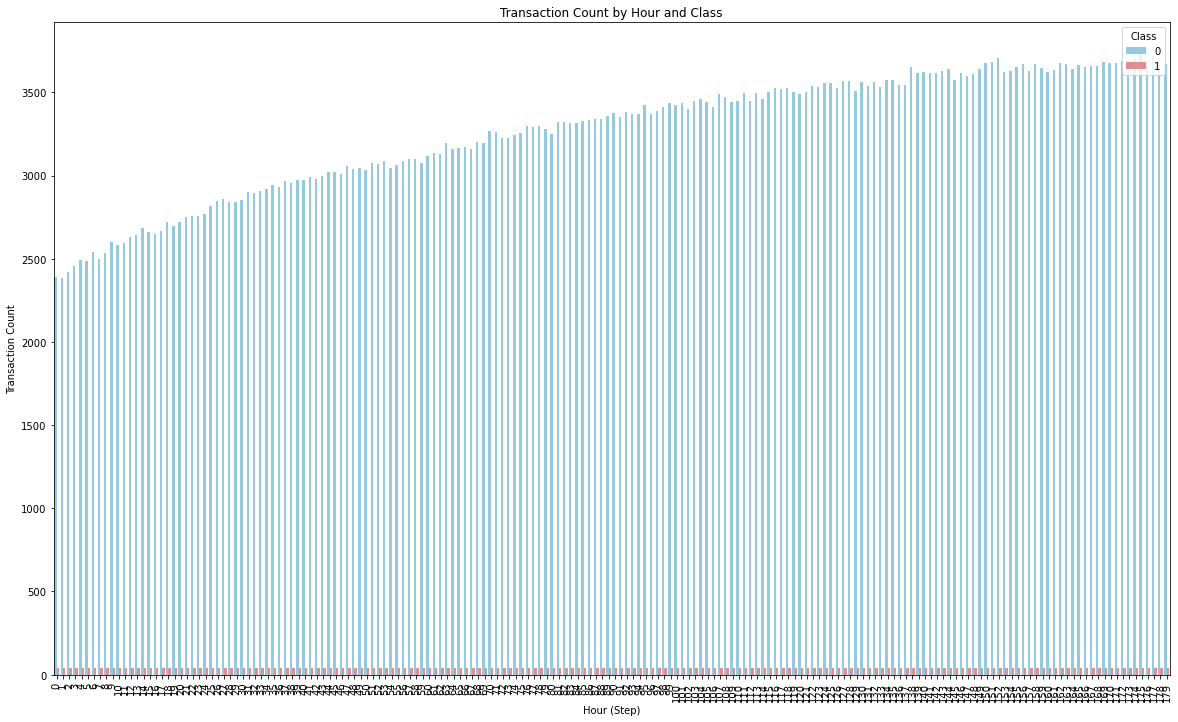

In [251]:
#Time series plot of transaction count by hour
#Visualizing trends over time (step) which representing hours


plt.figure(figsize=(20, 12))
sns.countplot(data=data, x='step', hue='fraud', palette=['skyblue', 'lightcoral'])
plt.xlabel('Hour (Step)')
plt.ylabel('Transaction Count')
plt.title('Transaction Count by Hour and Class')
plt.xticks(rotation=90)
plt.legend(title='Class', loc='upper right')
plt.show()

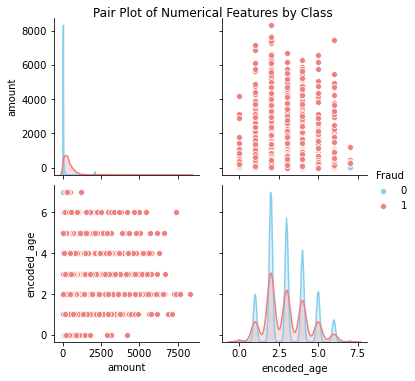

In [252]:
#Create a pair plot of numerical features
#Visualizing the relationships between numerical features for both fraud and benign transactions

numerical_features = ['amount', 'encoded_age']
data_for_pairplot = X[numerical_features].copy()
data_for_pairplot['Fraud'] = y
sns.pairplot(data=data_for_pairplot, hue='Fraud', palette=['skyblue', 'lightcoral'])
plt.suptitle('Pair Plot of Numerical Features by Class', y=1.02)
plt.show()

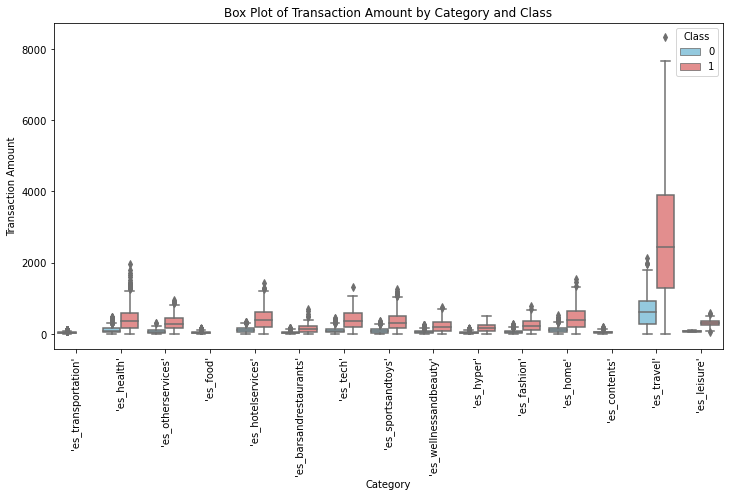

In [253]:
#Creating box plots for (category) by class
#Visualizing how categorical features are related to the target and identify potential outliers within categories

plt.figure(figsize=(12, 6))
sns.boxplot(data=X, x='category', y='amount', hue=y, palette=['skyblue', 'lightcoral'])
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.title('Box Plot of Transaction Amount by Category and Class')
plt.xticks(rotation=90)
plt.legend(title='Class', loc='upper right')
plt.show()


# Feature Engineering

1.Create new relevant features if possible, such as the time of day from the step column

In [254]:
#Since there are 180 steps, each step corresponds to approximately one day, so we can calculate the hour of the day
#where: 
#0 represents: 12AM, 1 represents: 1AM, 2 represents: 2AM, 3 represents: 3AM, ..., 11 represents: 23PM

X['hour_of_day'] = (X['step'] % 24).astype(int)

In [255]:
X

,step,customer,merchant,category,amount,encoded_age,gender_'E',gender_'F',gender_'M',gender_'U',hour_of_day
0,0,'C1093826151','M348934600','es_transportation',4.55,4,0,0,1,0,0
1,0,'C352968107','M348934600','es_transportation',39.68,2,0,0,1,0,0
2,0,'C2054744914','M1823072687','es_transportation',26.89,4,0,1,0,0,0
3,0,'C1760612790','M348934600','es_transportation',17.25,3,0,0,1,0,0
4,0,'C757503768','M348934600','es_transportation',35.72,5,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','M1823072687','es_transportation',20.53,3,0,1,0,0,11
594639,179,'C650108285','M1823072687','es_transportation',50.73,4,0,1,0,0,11
594640,179,'C123623130','M349281107','es_fashion',22.44,2,0,1,0,0,11
594641,179,'C1499363341','M1823072687','es_transportation',14.46,5,0,0,1,0,11


In [256]:
y.value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

2.Normalize or scale numerical features as needed.

# Model Selection, Training, Evaluation

In [257]:
#Encoding other categorical features (customer, merchant, category)

label_encoder = LabelEncoder() 
X['customer'] = label_encoder.fit_transform(X['customer'])
X['merchant'] = label_encoder.fit_transform(X['merchant'])
X['category'] = label_encoder.fit_transform(X['category'])

In [258]:
#Splitting data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True,stratify=y)

In [259]:
X_train

,step,customer,merchant,category,amount,encoded_age,gender_'E',gender_'F',gender_'M',gender_'U',hour_of_day
542840,166,1363,18,12,54.54,4,0,1,0,0,22
331166,107,437,30,12,50.16,3,0,1,0,0,11
534460,163,812,30,12,30.45,1,0,1,0,0,19
330950,107,1503,18,12,42.08,3,0,1,0,0,11
24724,9,2909,30,12,51.21,3,0,1,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...
52982,20,1674,30,12,11.56,2,0,1,0,0,20
219940,74,154,45,3,27.88,4,0,1,0,0,2
20419,8,977,18,12,31.59,3,0,0,1,0,8
497957,153,2539,45,3,3.77,6,0,0,1,0,9


# Machine Learning Algorithms

In [271]:
models = {}

#Random Forest
models['Random Forest'] = RandomForestClassifier()

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

#Gradient Boosting
models['Gradient Boosting'] = GradientBoostingClassifier(n_estimators=100, random_state=42)

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [272]:
accuracy, precision, recall, f_score = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier 
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f_score[key] = f1_score(predictions, y_test)

C:\Users\omar elayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [273]:
df_models = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['F1-Score'] = f_score.values()

df_models

,Accuracy,Precision,Recall,F1-Score
Random Forest,0.995706,0.730093,0.896023,0.804592
Logistic Regression,0.992315,0.510185,0.778799,0.616503
Gradient Boosting,0.995499,0.712037,0.894706,0.792988
K-Nearest Neighbor,0.993475,0.594444,0.816794,0.688103


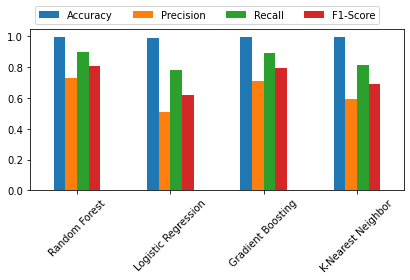

In [274]:
ax  = df_models.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 10})
plt.tight_layout()

# Best Models Evaluation and Interpretations

#Since we have an imbalanced datasets, it's essential to choose evaluation metrics that are more informative than accuracy
#Accuracy can be misleading in such cases 
#Common evaluation metrics for imbalanced datasets include (precision, recall, F1-score)

# Handling Imbalance

Since the datasets have an imbalance class problem, SMOTE oversampling technique will performed to generate new minority class samples

In [275]:
sm = SMOTE(random_state=42)

X_with_over_sampling, y_with_over_sampling = sm.fit_resample(X, y)
X_train_with_over_sampling, X_test_with_over_sampling, y_train_with_over_sampling, y_test_with_over_sampling = train_test_split(X_with_over_sampling,y_with_over_sampling,test_size=0.3,random_state=42,shuffle=True,stratify=y_with_over_sampling)

In [276]:
accuracy, precision, recall, f_score = {}, {}, {}, {}

for key in models.keys():
    
    #Fit the classifier 
    models[key].fit(X_train_with_over_sampling, y_train_with_over_sampling)
    
    #Prediction 
    predictions = models[key].predict(X_test_with_over_sampling)
    
    #Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test_with_over_sampling)
    precision[key] = precision_score(predictions, y_test_with_over_sampling)
    recall[key] = recall_score(predictions, y_test_with_over_sampling)
    f_score[key] = f1_score(predictions, y_test_with_over_sampling)

C:\Users\omar elayan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [277]:
df_models = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['F1-Score'] = f_score.values()

df_models

,Accuracy,Precision,Recall,F1-Score
Random Forest,0.996227,0.998564,0.993917,0.996235
Logistic Regression,0.909546,0.887705,0.928252,0.907526
Gradient Boosting,0.979496,0.986251,0.973104,0.979633
K-Nearest Neighbor,0.984994,0.998332,0.972393,0.985192


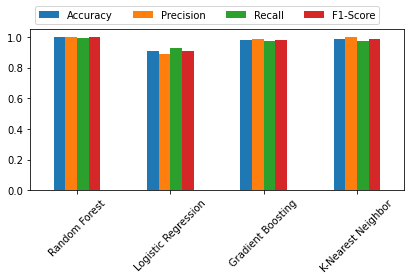

In [278]:
ax  = df_models.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 10})
plt.tight_layout()

Random Forest is the best classifier

Optimize hyperparameters of the selected model for better performance 

Optimize hyperparameters for the (Random Forest Classifier) using Grid Search

In [282]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [8, 10],
    'class_weight': ['balanced'],
    'verbose': [1]
}

In [283]:
rf_classifier = RandomForestClassifier(random_state=42)

#GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_with_over_sampling, y_train_with_over_sampling)

best_hyperparameters = grid_search.best_params_

best_rf_classifier = RandomForestClassifier(**best_hyperparameters, random_state=42)

best_rf_classifier.fit(X_train_with_over_sampling, y_train_with_over_sampling)
y_pred = best_rf_classifier.predict(X_test_with_over_sampling)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.8min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.6min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.9min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.1min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Do

In [292]:
optimized_rf_accuracy = accuracy_score(y_test_with_over_sampling, y_pred)
optimized_rf_precision = precision_score(y_test_with_over_sampling, y_pred)
optimized_rf_recall = recall_score(y_test_with_over_sampling, y_pred)
optimized_rf_f1 = f1_score(y_test_with_over_sampling, y_pred)
optimized_rf_confusion = confusion_matrix(y_test_with_over_sampling, y_pred)
class_names = ['Benign', 'Fraud']
optimized_rf_classification_report = classification_report(y_test_with_over_sampling, y_pred, target_names=class_names)

print("Accuracy:", optimized_rf_accuracy)
print("Precision:", optimized_rf_precision)
print("Recall:", optimized_rf_recall)
print("F1 Score:", optimized_rf_f1)
print("Confusion Matrix:\n", optimized_rf_confusion)
print("Classification Report:\n", optimized_rf_classification_report)

Accuracy: 0.983476420420693
Precision: 0.9717883266241785
Recall: 0.9958634307989991
F1 Score: 0.9836785938480854
Confusion Matrix:
 [[171138   5095]
 [   729 175504]]
Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      0.97      0.98    176233
       Fraud       0.97      1.00      0.98    176233

    accuracy                           0.98    352466
   macro avg       0.98      0.98      0.98    352466
weighted avg       0.98      0.98      0.98    352466



Text(69.0, 0.5, 'Truth')

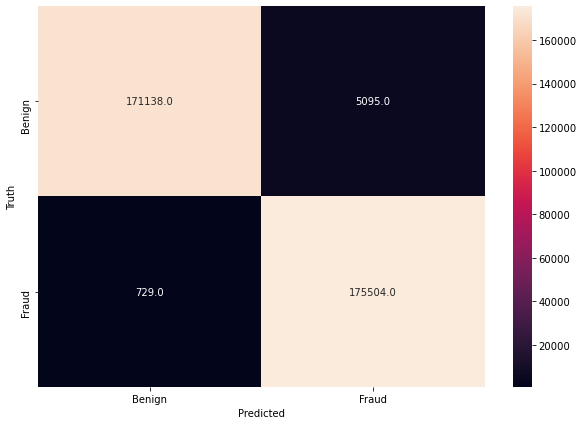

In [290]:
#plotting Confusion Matrix in another way

plt.figure(figsize = (10,7))
class_names = ['Benign', 'Fraud'] 
cm = confusion_matrix(y_test_with_over_sampling, y_pred)
sn.heatmap(cm, annot=True, fmt=".1f", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')